# Importando Librerias

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [5]:
%matplotlib inline
sns.set_style("darkgrid")

# Preparando los datos

### Preparacion y limpieza
- La ultima columna debera contener la etiqueta (valor o categoria a predecir) ademas debe tener un nombre en especifico, por lo tanto pondremos como nombre "label".
- No deben de haber valores nulos en el dataframe.

In [6]:
df = pd.read_csv('../data/Iris.csv')

In [7]:
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Procederemos a eliminar columnas innecesarias
df = df.drop("Id", axis=1)
# Cambiamos el nombre a la ultima columna
df = df.rename(columns={'species': 'label'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Split de Entrenamiento y de Prueba

La siguiente funcion se encarga de segmentar el dataframe en dos partes. Una de entrenamiento y otra de prueba.

In [9]:
def entrenamiento_prueba_split(df, tamanio_prueba):
    '''
    Retorna dos dataframes distintos, uno de
    entrenamiento y otro de prueba.
    
    Parametros:
    df: dataframe completo, sin segmentar.
    tamanio_prueba: tamaño de la muestra de prueba.
    '''
    if isinstance(tamanio_prueba, float):
        tamanio_prueba = round(tamanio_prueba * len(df))
        
    indices = df.index.tolist()
    prueba_indices = random.sample(population=indices, k=tamanio_prueba)
    
    df_prueba = df.loc[prueba_indices]
    df_entrenamiento = df.drop(prueba_indices)
    
    return df_entrenamiento, df_prueba    

In [10]:
random.seed(0)
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df, 0.2)

# Funciones de Apoyo

Nuestras funciones de apoyo seran de acuerdo al algoritmo para encontrar nuestro arbol de decision.
- verificar_pureza
- clasificar_data
- obtener_posibles_segmentos
- segmentar_data
- calcular_entropia
- calcular_entropia_total
- determinar_mejor_segmento

# Verificar Pureza de los datos

In [11]:
def verificar_pureza(data):
    label_columna = data[:, -1]
    valores_unicos = np.unique(label_columna)
    
    if len(valores_unicos) == 1:
        return True
    else:
        return False

In [12]:
values = df_prueba[df_prueba['petal_width'] < 0.8].values
verificar_pureza(values)

True

# Clasificacion de los Datos

In [13]:
def clasificar_data (data):
    label_columna = data[:, -1]
    valores_unicos, cont_valores_unicos = np.unique(label_columna, return_counts=True)
    
    indice = cont_valores_unicos.argmax()
    clasificacion = valores_unicos[indice]
    return clasificacion

# Obtener los segmentos

In [29]:
def obtener_posibles_segmentos(data):
    posibles_segmentos = {}
    _, n_columnas = data.shape
    for columna_indice in range(n_columnas - 1):
        valores = data[:, columna_indice]
        valores_unicos = np.unique(valores)
        posibles_segmentos[columna_indice] = valores_unicos
        
    return posibles_segmentos

In [30]:
posibles_segmentos = obtener_posibles_segmentos(df_entrenamiento.values)
posibles_segmentos

{0: array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7.0, 7.1, 7.2, 7.6, 7.7, 7.9], dtype=object),
 1: array([2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3,
        3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4], dtype=object),
 2: array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3.3, 3.5, 3.8, 3.9,
        4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2,
        5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.4, 6.6, 6.7, 6.9],
       dtype=object),
 3: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
        1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], dtype=object)}

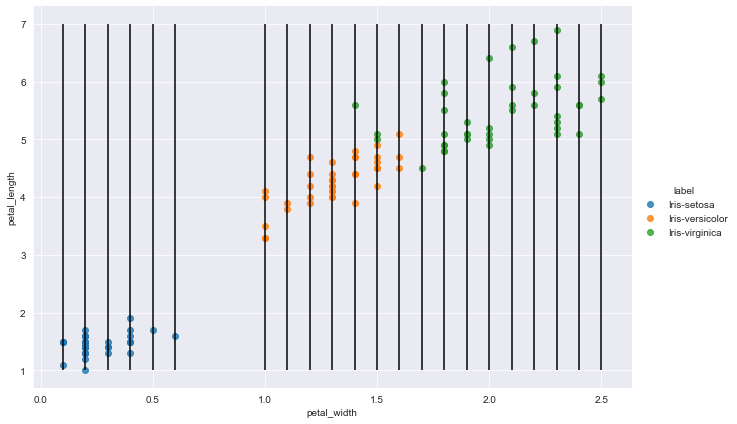

In [36]:
sns.lmplot(data=df_entrenamiento, x='petal_width', y='petal_length',hue='label', fit_reg=False, height=6, aspect=1.5)
plt.vlines(x=posibles_segmentos[3], ymin=1, ymax=7)

# Segmentar los datos

In [37]:
def segmentar_data(data, columna_segmentar, valor_segmentar):
    valores_columna_seg = data[:, columna_segmentar]
    
    tipo_de_carcteristica = TIPO_CARACTERISTICAS[columna_segmentar]
    if tipo_de_caracteristica == 'continuo':
        data_abajo = data[valores_columna_seg <= valor_segmentar]
        data_arriba = data[valores_columna_seg > valor_segmentar]
    # En el caso de que nuestra caracteristica sea categorica
    else:
        data_abajo = data[valores_columna_seg == valor_segmentar]
        data_arriba = data[valores_columna_seg != valor_segmentar]
        
    return data_arriba, data_abajo


# Determinar Entropia Mas Baja

In [38]:
def calcular_entropia(data):
    label_columna = data[:, -1]
    _, cantidad = np.unique(label_columna, return_counts=True)
    
    probabilidad = cantidad / cantidad.sum()
    entropia = sum(probabilidad * -np.log2(probabilidad))
    
    return entropia

In [41]:
def calcular_entropia_total(data_abajo, data_arriba):
    n = len(data_abajo) + len(data_arriba)
    p_data_abajo = len(data_abajo) / n
    p_data_arriba = len(data_arriba) / n
    
    entropia_total = (p_data_abajo * calcular_entropia(data_abajo)
                     + p_data_arriba * calcular_entropia(data_arriba))
    
    return entropia_total

In [43]:
def determinar_mejor_segmento(data, posibles_segmentos):
    
    entropia_total = 999
    for columna_indice in posibles_segmentos:
        for valor in posibles_segmentos:
            data_abajo, data_arriba = segmentar_data(data, 
                                                     columna_segmentar=columna_indice, 
                                                     valor_segmentar=valor)
            entropia_total_actual = calcular_entropia_total(data_abajo, data_arriba)
            
            if entropia_total_actual <= entropia_total:
                entropia_total = entropia_total_actual
                mejor_columna_segmento = columna_indice
                mejor_valor_segmento = valor
                
    return mejor_columna_segmento, mejor_valor_segmento

# Algoritmo del Arbol de Decision 